## Проект SQL

В этой проекте вам нужно написать несколько SQL-запросов в Jupyter Notebook. Эти задания проверят вручную, и вы получите комментарии к составленным запросам. 

Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy. 

Некоторые задания включают дополнительные вопросы — не пропустите их. На часть вопросов можно ответить текстом, а для некоторых понадобится визуализация. Помните, что результат запроса можно выгрузить в датафрейм. 

Чтобы ожидаемый результат было легче представить, мы добавили к каждому заданию небольшой фрагмент итоговой таблицы. В запросах вы можете использовать любые подходящие названия полей.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [6]:
# напишите запрос
query = '''
SELECT DATE_TRUNC('month', creation_date)::date AS month_date,
       SUM(views_count) AS total_views
FROM stackoverflow.posts
WHERE creation_date::date BETWEEN '2008-01-01' AND '2008-12-31'
GROUP BY month_date
ORDER BY total_views DESC;
'''

# выполните запрос
sample_df_1 = pd.read_sql_query(query, con=engine) 
sample_df_1.style.hide_index()

month_date,total_views
2008-09-01,452928568
2008-10-01,365400138
2008-11-01,221759651
2008-12-01,197792841
2008-08-01,131367083
2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

**Вывод:** Самое маленькое количество запросов в июле 2008 года, скорее всего оно связано со началом публичной работы сайта, веротнее всего сайт начал работу не с начала месяца. Далее сайт набирал популярность и это вызвало увеличением количества просмотров, пик наблюдается в сентябре. Дальнейшее падение количества просмотров может быть связано с тем, что на многие вопросы ответы были получены и вопросов стало меньше.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [7]:
# напишите запрос
query = '''
SELECT u.display_name,
       COUNT(DISTINCT u.id)
FROM stackoverflow.users AS u
INNER JOIN stackoverflow.posts AS p ON u.id = p.user_id
LEFT OUTER JOIN stackoverflow.post_types AS pt ON p.post_type_id = pt.id
WHERE pt.type LIKE 'Answer' AND p.creation_date::date BETWEEN u.creation_date::date AND (u.creation_date::date + INTERVAL '1 month')
GROUP BY u.display_name
HAVING COUNT(p.id) > 100
ORDER BY display_name;
'''

# выполните запрос
sample_df_2 = pd.read_sql_query(query, con=engine) 
sample_df_2.style.hide_index()

display_name,count
1800 INFORMATION,1
Adam Bellaire,1
Adam Davis,1
Adam Liss,1
Alan,8
Amy B,1
Ben Hoffstein,1
Brian,15
Cade Roux,1
CesarB,1


In [8]:
sample_df_2['count'].value_counts()

1     60
3      2
10     2
15     2
16     2
29     2
5      1
7      1
8      1
9      1
11     1
12     1
17     1
19     1
21     1
Name: count, dtype: int64

Какие аномалии наблюдаются в данных? О чём они говорят?

**Вывод:** Из полученных данных видно, что у 19 имен пользователей есть по несколько уникальных user_id. Максимальное количество уникальных id  29. Скорее всего речь идет об однофамильцах или есть возможность одному пользователю зарегестрироваться несколько раз (но это надо проверять). 

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [9]:
# напишите запрос
query = '''
WITH users AS
           (SELECT u.id AS id
            FROM stackoverflow.users AS u
            INNER JOIN stackoverflow.posts AS p ON u.id = p.user_id
            WHERE DATE_TRUNC('month', u.creation_date)::date = '2008-09-01' AND DATE_TRUNC('month', p.creation_date)::date = '2008-12-01')

SELECT DATE_TRUNC('month', creation_date)::date AS month,
       COUNT(id) 
FROM stackoverflow.posts
WHERE user_id IN (SELECT id
                  FROM users)
GROUP BY month
ORDER BY month DESC;
'''

# выполните запрос
sample_df_3 = pd.read_sql_query(query, con=engine) 
sample_df_3.style.hide_index()

month,count
2008-12-01,17641
2008-11-01,18294
2008-10-01,27171
2008-09-01,24870
2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

**Вывод:** По одному из условий задачи необходимо было посчитать количество постов по месяцам от пользователей, которые были зарегистрированы в сентябре. Однако в полученных данных мы видим 32 поста в августе, пользователи зарегистрировавшиеся в сентябре не могли написать данные посты. Тут скорре всего какая-то техническая ошибка. 

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [10]:
# напишите запрос
query = '''
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date) AS sum_cml
FROM stackoverflow.posts
ORDER BY user_id
'''
# выполните запрос
sample_df_4 = pd.read_sql_query(query, con=engine) 
sample_df_4

,user_id,creation_date,views_count,sum_cml
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [11]:
# напишите запрос
query = '''

WITH session AS
  (SELECT user_id,
        EXTRACT(DAY FROM creation_date) AS day_number,
        COUNT(id) AS count
   FROM stackoverflow.posts
   WHERE DATE_TRUNC ('month', creation_date)::date = '2008-08-01' AND user_id IN (SELECT user_id
                                                                                  FROM stackoverflow.posts
                                                                                  WHERE DATE_TRUNC ('month', creation_date)::date = '2008-08-01'
                                                                                  GROUP BY user_id
                                                                                  HAVING COUNT(id) > 120)
   GROUP BY user_id,
            day_number)

SELECT DISTINCT user_id, 
       AVG(count) AS avg_count
FROM session
GROUP BY user_id
ORDER BY avg_count      
 
 
'''

# выполните запрос
sample_df_5 = pd.read_sql_query(query, con=engine) 
sample_df_5.style.hide_index()

user_id,avg_count
116,4.777778
234,5.208333
91,5.681818
905,7.000000
383,7.277778


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [12]:
# напишите запрос
query = '''
WITH days AS
         (SELECT COUNT(DISTINCT creation_date::date) AS count
          FROM stackoverflow.posts
          WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07'
          GROUP BY user_id)

SELECT CAST(ROUND(AVG(count)) AS int) AS result
FROM days     
'''
# выполните запрос
sample_df_6 = pd.read_sql_query(query, con=engine) 
sample_df_6.style.hide_index()

result
2


Проанализируйте итоговую таблицу — какие выводы можно сделать?

**Вывод:** Исходя из полученного результата пользователи с период с 1 по 7 декабря в среднем взаимодействовали с платформой 2 дня. 

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [13]:
# напишите запрос
query = '''
WITH session AS
    (SELECT user_id,
            creation_date,
            LAG (creation_date, 2) OVER (PARTITION BY user_id ORDER BY creation_date) AS last_post
     FROM stackoverflow.posts
     ORDER BY user_id,
           creation_date)     
SELECT user_id,
       creation_date, 
       CASE
           WHEN EXTRACT(MONTH FROM last_post) = 7.0 THEN 'July'
           WHEN EXTRACT(MONTH FROM last_post) = 8.0 THEN 'August'
           WHEN EXTRACT(MONTH FROM last_post) = 9.0 THEN 'September'
           WHEN EXTRACT(MONTH FROM last_post) = 10.0 THEN 'October'
           WHEN EXTRACT(MONTH FROM last_post) = 11.0 THEN 'November'
           WHEN EXTRACT(MONTH FROM last_post) = 12.0 THEN 'December'
       END
FROM session; 
      
'''
# выполните запрос
sample_df_7 = pd.read_sql_query(query, con=engine) 
sample_df_7

,user_id,creation_date,case
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [14]:
# напишите запрос 
query = '''
WITH p AS
       (SELECT DISTINCT user_id,
               FIRST_VALUE (DATE_TRUNC('month', creation_date)) OVER (PARTITION BY user_id ORDER BY DATE_TRUNC('month',creation_date)) AS cohort_dt 
        FROM stackoverflow.posts),
        
profile AS
     (SELECT *,
             COUNT(user_id) OVER (PARTITION BY cohort_dt) AS cohort_users_cnt
      FROM p),
      
sessions AS 
        (SELECT user_id,
         DATE_TRUNC('month', creation_date) AS session_date
         FROM stackoverflow.posts
         GROUP BY user_id,
                  session_date) 
                  
SELECT  pr.cohort_dt,
        s.session_date,
        COUNT(pr.user_id) AS user_cnt,
        pr.cohort_users_cnt,
        ROUND(COUNT(pr.user_id)::numeric*100/pr.cohort_users_cnt, 2) AS retantion_rate
FROM profile AS pr
INNER JOIN sessions AS s ON pr.user_id = s.user_id
GROUP BY 1,
         2, 
         4 
ORDER BY cohort_dt,
         session_date; 
'''

# выполните запрос

sample_df_8 = pd.read_sql_query(query, con=engine) 
sample_df_8

,cohort_dt,session_date,user_cnt,cohort_users_cnt,retantion_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

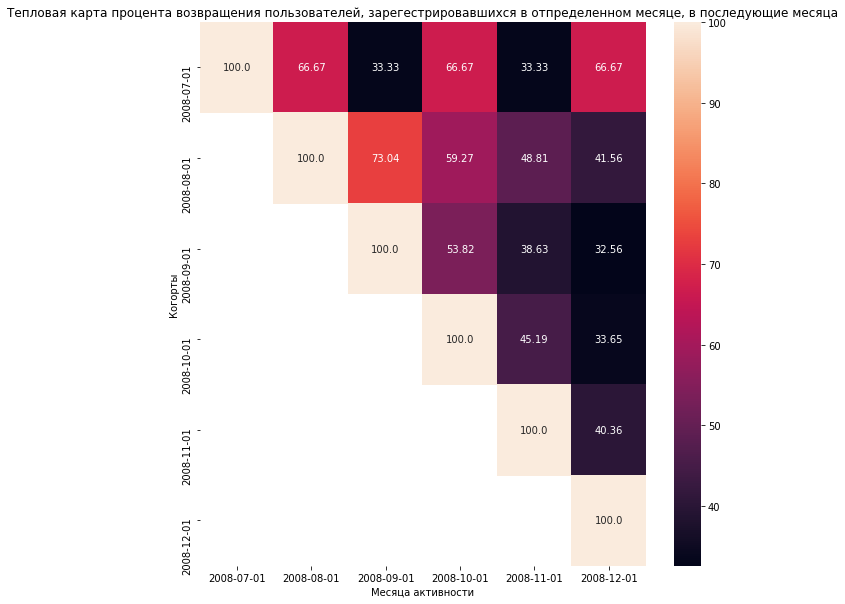

In [16]:
retention = sample_df_8.pivot('cohort_dt', 'session_date', 'retantion_rate')
retention.index = [str(x) [0:10] for x in retention.index]
retention.columns = [str(x) [0:10] for x in retention.columns]
plt.figure (figsize=(10,10))
sns.heatmap(retention, annot=True, fmt='')
plt.title('Тепловая карта процента возвращения пользователей, зарегестрировавшихся в отпределенном месяце, в последующие месяца')
plt.xlabel('Месяца активности')
plt.ylabel('Когорты')
plt.show()

**Вывод:** Во всех когортах кроме первой наблюдается одинаковая тенденция  -  от месяца к месяцу процент пользователей, вернувшихся с постами падает. Аналогичная ситуация наблюдается и по когортам, пользолватели каждой последующей когорты реже возвращаются. В первой кагорте наблюдается нехарактерная тенденция значения чередуются 66 и 33 %, на мой взгляд это обусловлено малочисленностью данной группы, она состоит из 3 пользователей. Если возвращается один пользователь, то это дает 33%, а если 2 до 60%. 

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [17]:
# напишите запрос
query = '''
WITH session AS
             (SELECT  CAST(EXTRACT(MONTH FROM creation_date) AS int) AS creation_month,
                      COUNT(id) AS count
              FROM stackoverflow.posts
              WHERE CAST(EXTRACT(MONTH FROM creation_date) AS int) BETWEEN 9 AND 12
              GROUP BY creation_month)

SELECT *,
       ROUND((count::numeric/LAG(count) OVER()-1)*100, 2)
FROM session       
'''

# выполните запрос
sample_df_9 = pd.read_sql_query(query, con=engine) 
sample_df_9

,creation_month,count,round
0,9,70371,NaN
1,10,63102,-10.33
2,11,46975,-25.56
3,12,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

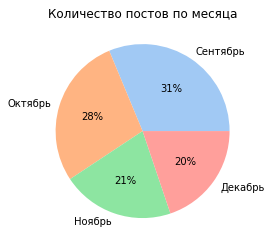

In [18]:
lables = ['Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'] 
colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(x=sample_df_9['count'], labels=lables, colors=colors, autopct='%.0f%%' )
plt.title('Количество постов по месяца')
plt.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [19]:
# напишите запрос
query = '''
WITH users AS
          (SELECT user_id
           FROM stackoverflow.posts
           GROUP BY user_id
           ORDER BY COUNT(id) DESC
           LIMIT 1),

session AS
        (SELECT EXTRACT(WEEK FROM creation_date)::int AS week_creation,
                creation_date
         FROM stackoverflow.posts 
         WHERE DATE_TRUNC('month', creation_date)::date = '2008-10-01' AND user_id IN (SELECT user_id
                                                                                       FROM users))
SELECT DISTINCT week_creation,
       LAST_VALUE(creation_date) OVER (PARTITION BY week_creation ORDER BY creation_date ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING)
FROM session;           
        
           
'''

# выполните запрос
sample_df_10 = pd.read_sql_query(query, con=engine) 
sample_df_10.style.hide_index()

week_creation,last_value
40,2008-10-05 09:00:58
41,2008-10-12 21:22:23
42,2008-10-19 06:49:30
43,2008-10-26 21:44:36
44,2008-10-31 22:16:01
